In [79]:
import os
from PIL import Image
import shutil

folder_path = 'test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
try:
    os.listdir(folder_path)
    shutil.rmtree(f"{folder_path}/.ipynb_checkpoints")
except:
    pass
print("finish")

finishh: test\outdoor\96.jpg  ***


In [80]:
folder_path = 'train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
try:
    os.listdir(folder_path)
    shutil.rmtree(f"{folder_path}/.ipynb_checkpoints")
except:
    pass
print("finish")

finishh: train\outdoor\99.jpg  ***


In [81]:
folder_path = 'valid'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    try:
        shutil.rmtree(f"{sub_folder_path}/.ipynb_checkpoints")
        for filee in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, filee)
            print('** Path: {}  **'.format(file_path), end="\r", flush=True)
            im = Image.open(file_path)
            rgb_im = im.convert('RGB')
            if filee.split('.')[1] not in extensions:
                extensions.append(filee.split('.')[1])
    except:
        for filee in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, filee)
            print('** Path: {}  **'.format(file_path), end="\r", flush=True)
            im = Image.open(file_path)
            rgb_im = im.convert('RGB')
            if filee.split('.')[1] not in extensions:
                extensions.append(filee.split('.')[1])

try:
    os.listdir(folder_path)
    shutil.rmtree(f"{folder_path}/.ipynb_checkpoints")
except:
    pass
print("finish")

finishh: valid\outdoor\1 (99).jpg  ***


In [82]:
import tensorflow
import tensorflow as tf
# from tensorflow.keras.utils import np_utils
import numpy as np
from tensorflow import keras
from time import time
from tensorflow import repeat

In [83]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

In [84]:
train_data = datagen.flow_from_directory(
        directory='train',
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary")

Found 799 images belonging to 2 classes.


In [85]:
test_data = datagen.flow_from_directory(
    directory= 'test',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
)

Found 200 images belonging to 2 classes.


In [86]:
valid_data = datagen.flow_from_directory(
    directory='valid',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
)

Found 200 images belonging to 2 classes.


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
#Adding sequential model in keras
model = Sequential()
# Image size 64*64 
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
#ReLu adds nonlinearity to the network.
model.add(Activation('relu'))
# Pooling helps to reduce dimensions.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Fully connected layer to detect final high level features.
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
#Dropout is added to reduce overfitting.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)       

In [88]:
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [89]:
# cp = keras.callbacks.ModelCheckpoint('CNN', 
#                                                  save_weights_only=True,
#                                                  verbose=1)
# tb=keras.callbacks.TensorBoard(log_dir='CNN'.format(time()), histogram_freq=0,  
#           write_graph=True, write_images=True)
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# history=model.fit(
#         train_data,
#         steps_per_epoch=train_data.n,
#         epochs=50,
#         validation_data=valid_data,
#         validation_steps=valid_data.n, callbacks = [tb])
# model.save('mymodel.h5')
cp = keras.callbacks.ModelCheckpoint('CNN', 
                                                 save_weights_only=True,
                                                 verbose=1)
tb=keras.callbacks.TensorBoard(log_dir='CNN'.format(time()), histogram_freq=0,  
          write_graph=True, write_images=True)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history=model.fit(
        train_data,
        steps_per_epoch=int(799/32),
        epochs=50,
        validation_data=valid_data,
        validation_steps=int(200/32))
model.save('mymodel_v5.h5')

Epoch 1/50
24/24 [==============================] - 7s 265ms/step - loss: 0.6522 - accuracy: 0.6336 - val_loss: 0.5319 - val_accuracy: 0.8385
Epoch 2/50
24/24 [==============================] - 6s 257ms/step - loss: 0.5522 - accuracy: 0.7392 - val_loss: 0.4218 - val_accuracy: 0.8073
Epoch 3/50
24/24 [==============================] - 6s 256ms/step - loss: 0.5638 - accuracy: 0.7210 - val_loss: 0.4399 - val_accuracy: 0.8333
Epoch 4/50
24/24 [==============================] - 6s 256ms/step - loss: 0.4953 - accuracy: 0.7588 - val_loss: 0.4351 - val_accuracy: 0.7812
Epoch 5/50
24/24 [==============================] - 6s 255ms/step - loss: 0.5266 - accuracy: 0.7666 - val_loss: 0.3824 - val_accuracy: 0.8802
Epoch 6/50
24/24 [==============================] - 6s 256ms/step - loss: 0.4637 - accuracy: 0.7914 - val_loss: 0.3324 - val_accuracy: 0.8698
Epoch 7/50
24/24 [==============================] - 6s 257ms/step - loss: 0.4589 - accuracy: 0.8240 - val_loss: 0.3196 - val_accuracy: 0.8490
Epoch 

In [94]:
from keras.models import load_model
model = load_model('mymodel.h5')

scores = model.evaluate_generator(valid_data, len(valid_data))
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

accuracy: 98.00%


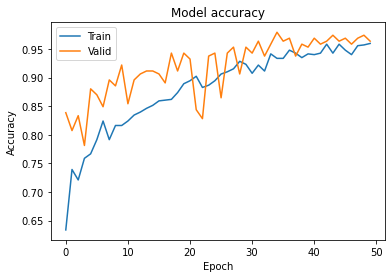

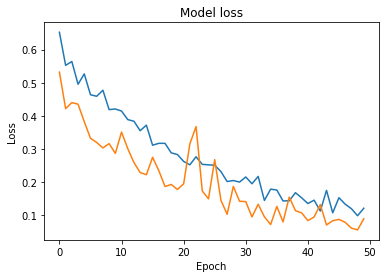

In [92]:
import matplotlib.pyplot as plt


# plots keras
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [20]:
#probabilities = model.predict_generator(test_data, len(test_data))
#print(probabilities)

In [21]:
label=train_data.class_indices

In [22]:
label

{'indoor': 0, 'outdoor': 1}

In [23]:
import numpy as np
from keras.preprocessing import image
dataset = "indoor"
indoor_cnt = 0
for i in range(1,101):
    try:
        result = list(label.keys())
        img = image.load_img(f'valid/{dataset}/1 ({i}).jpg', target_size=(64, 64))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)

        print (i, result[classes[0][0]])
        if result[classes[0][0]] == dataset:
            indoor_cnt+=1
    except:
        pass
print(indoor_cnt)

C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 indoor
2 indoor
3 indoor
4 indoor
5 indoor
6 indoor
7 indoor
8 indoor
9 indoor
10 indoor
11 indoor
12 indoor
13 indoor
14 indoor
15 indoor
16 indoor
17 indoor
18 indoor
19 indoor
20 indoor
21 indoor
22 indoor
23 indoor
24 indoor
25 indoor
26 indoor
27 indoor
28 indoor
29 indoor
30 indoor
31 indoor
32 indoor
33 indoor
34 indoor
35 indoor
36 indoor
37 indoor
38 indoor
39 indoor
40 indoor
41 indoor
42 indoor
43 indoor
44 indoor
45 indoor
46 indoor
47 indoor
48 indoor
49 indoor
50 indoor
51 indoor
52 indoor
53 indoor
54 indoor
55 indoor
56 indoor
57 indoor
58 indoor
59 indoor
60 indoor
61 indoor
62 indoor
63 indoor
64 indoor
65 indoor
66 indoor
67 indoor
68 indoor
69 indoor
70 indoor
71 indoor
72 indoor
73 indoor
74 indoor
75 indoor
76 indoor
77 indoor
78 indoor
79 indoor
80 indoor
81 indoor
82 indoor
83 indoor
84 indoor
85 indoor
86 indoor
87 indoor
88 indoor
89 indoor
90 indoor
91 indoor
92 indoor
93 indoor
94 indoor
95 indoor
96 indoor
97 indoor
98 indoor
99 indoor
100 indoor
100


In [116]:
import numpy as np
from keras.preprocessing import image
dataset = "outdoor"
outdoor_cnt = 0
for i in range(1,101):
    try:
        result = list(label.keys())
        img = image.load_img(f'valid/{dataset}/1 ({i}).jpg', target_size=(64, 64))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)

        print (i, result[classes[0][0]])
        if result[classes[0][0]] == dataset:
            outdoor_cnt+=1
    except:
        pass
print(outdoor_cnt)

1 outdoor
2 outdoor
3 indoor
4 outdoor
5 outdoor
6 outdoor
7 outdoor
8 outdoor
9 outdoor
10 outdoor
11 outdoor
12 outdoor
13 outdoor
14 outdoor
15 outdoor
16 outdoor
17 outdoor
18 outdoor
19 outdoor
20 outdoor
21 outdoor
22 outdoor
23 outdoor
24 outdoor
25 outdoor
26 indoor
27 outdoor
28 outdoor
29 outdoor
30 outdoor
31 outdoor
32 outdoor
33 outdoor
34 outdoor
35 outdoor
36 outdoor
37 outdoor
38 outdoor
39 outdoor
40 outdoor
41 outdoor
42 indoor
43 outdoor
44 outdoor
45 indoor
46 outdoor
47 outdoor
48 outdoor
49 outdoor
50 outdoor
51 outdoor
52 outdoor
53 indoor
54 outdoor
55 indoor
56 indoor
57 indoor
58 outdoor
59 outdoor
60 indoor
61 outdoor
62 indoor
63 outdoor
64 outdoor
65 outdoor
66 outdoor
67 outdoor
68 outdoor
69 outdoor
70 outdoor
71 indoor
72 outdoor
73 outdoor
74 outdoor
75 indoor
76 outdoor
77 outdoor
78 indoor
79 outdoor
80 outdoor
81 outdoor
82 outdoor
83 outdoor
84 outdoor
85 indoor
86 outdoor
87 outdoor
88 indoor
89 outdoor
90 outdoor
91 indoor
92 outdoor
93 outdoor
94

In [24]:
import numpy as np
from keras.preprocessing import image
dataset = "indoor"
indoor_cnt = 0
total = 0
for i in range(1,101):
    try:
        result = list(label.keys())
        img = image.load_img(f'test/{dataset}/{i}.jpg', target_size=(64, 64))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)
        
        total += 1
        print (total, result[classes[0][0]])
        if result[classes[0][0]] == dataset:
            indoor_cnt+=1
    except:
        pass
print(indoor_cnt)

1 indoor
2 indoor
3 indoor
4 indoor
5 indoor
6 indoor
7 indoor
8 indoor
9 indoor
10 indoor
11 indoor
12 indoor
13 indoor
14 indoor
15 indoor
16 indoor
17 indoor
18 indoor
19 outdoor
20 indoor
21 indoor
22 indoor
23 indoor
24 indoor
25 indoor
26 indoor
27 indoor
28 indoor
29 indoor
30 indoor
31 indoor
32 indoor
33 indoor
34 indoor
35 indoor
36 indoor
37 indoor
38 indoor
39 indoor
40 indoor
41 indoor
42 indoor
43 indoor
44 indoor
45 indoor
46 indoor
47 indoor
48 indoor
49 indoor
50 indoor
51 indoor
52 indoor
53 indoor
54 indoor
55 indoor
56 indoor
57 indoor
58 outdoor
59 indoor
60 indoor
61 indoor
62 indoor
63 indoor
64 indoor
62


In [25]:
import numpy as np
from keras.preprocessing import image
dataset = "outdoor"
outdoor_cnt = 0
total = 0
for i in range(1,101):
    try:
        result = list(label.keys())
        img = image.load_img(f'test/{dataset}/{i}.jpg', target_size=(64, 64))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)
        
        total += 1
        print (total, result[classes[0][0]])
        if result[classes[0][0]] == dataset:
            outdoor_cnt+=1
    except:
        pass
print(outdoor_cnt)

1 indoor
2 outdoor
3 outdoor
4 indoor
5 indoor
6 outdoor
7 indoor
8 indoor
9 indoor
10 indoor
11 indoor
12 indoor
13 indoor
14 indoor
15 indoor
16 outdoor
17 indoor
18 indoor
19 indoor
20 indoor
21 outdoor
22 indoor
23 indoor
24 indoor
25 indoor
26 outdoor
27 indoor
28 indoor
29 outdoor
30 indoor
31 indoor
32 outdoor
33 indoor
34 indoor
35 indoor
36 indoor
37 outdoor
38 indoor
39 indoor
40 indoor
41 indoor
42 indoor
43 indoor
44 indoor
45 outdoor
46 indoor
47 outdoor
48 outdoor
49 indoor
50 indoor
51 indoor
52 indoor
53 indoor
54 outdoor
55 indoor
56 indoor
57 indoor
58 indoor
59 outdoor
60 indoor
61 outdoor
62 indoor
63 outdoor
64 indoor
65 indoor
66 indoor
67 indoor
68 indoor
69 indoor
70 indoor
71 indoor
72 indoor
16


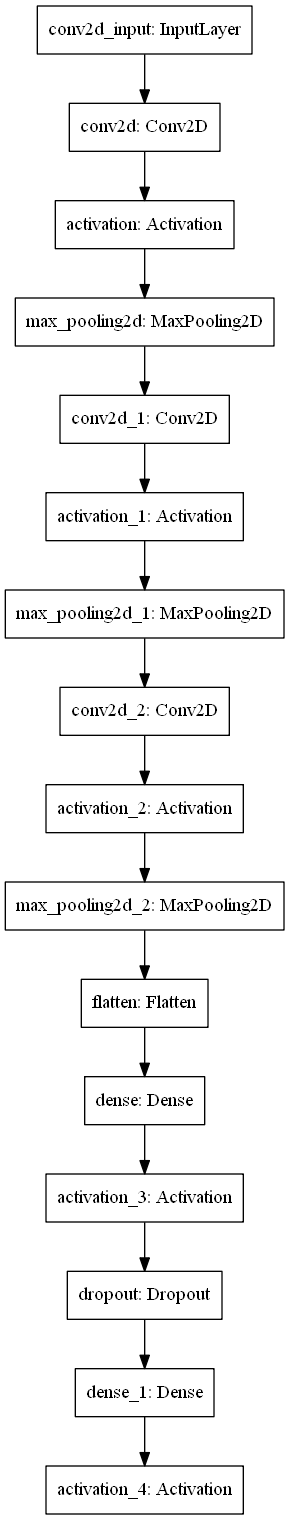

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')